<a href="https://colab.research.google.com/github/EltonGino/Tele_Custom_Churn/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [48]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

# Save the original categories for visualization
original_categories = df.select_dtypes(include=['object']).copy()

# Data Preprocessing
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])  # Encoding categorical variables

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])  # Scaling numerical features

# Splitting the dataset
X = df.drop(columns=['Churn', 'customerID'])  # Features
y = df['Churn']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split into train and test sets

# Model Building and Evaluation
model = RandomForestClassifier(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)
fig = px.bar(feature_importances, x=feature_importances.index, y='importance', title='Feature Importances')
fig.show()

# Correlation Heatmap
fig = go.Figure(data=go.Heatmap(
        z=df.corr().values,
        x=df.corr().columns,
        y=df.corr().columns,
        colorscale='Viridis'))
fig.update_layout(title='Correlation Heatmap')
fig.show()

# Use original categories for visualization
df_visualization = df.copy()
for column in original_categories.columns:
    df_visualization[column] = original_categories[column]

# Customer Demographics Analysis
# Gender vs Churn (Pie Chart)
gender_churn = df_visualization.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
gender_churn = gender_churn.reset_index()  # Reset index to convert the grouped data into a flat DataFrame
fig = px.pie(gender_churn, values='Yes', names='gender', title='Gender vs Churn')
fig.show()

# SeniorCitizen vs Churn (Bar Chart)
senior_citizen_churn = df_visualization.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
senior_citizen_churn = senior_citizen_churn.reset_index()  # Reset index to convert the grouped data into a flat DataFrame
fig = px.bar(senior_citizen_churn, x='SeniorCitizen', y=['No', 'Yes'], barmode='group', title='Senior Citizen vs Churn', labels={'value':'Proportion of Churn'})
fig.show()

# Partner vs Churn (Pie Chart)
partner_churn = df_visualization.groupby('Partner')['Churn'].value_counts(normalize=True).unstack()
partner_churn = partner_churn.reset_index()  # Reset index to convert the grouped data into a flat DataFrame
fig = px.pie(partner_churn, values='Yes', names='Partner', title='Partner vs Churn')
fig.show()

# Dependents vs Churn (Bar Chart)
dependents_churn = df_visualization.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack()
dependents_churn = dependents_churn.reset_index()  # Reset index to convert the grouped data into a flat DataFrame
fig = px.bar(dependents_churn, x='Dependents', y=['No', 'Yes'], barmode='group', title='Dependents vs Churn', labels={'value':'Proportion of Churn'})
fig.show()

# Service Usage Analysis
# InternetService vs Churn (Bar Chart)
internet_service_churn = df_visualization.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
internet_service_churn = internet_service_churn.reset_index()  # Reset index to convert the grouped data into a flat DataFrame
fig = px.bar(internet_service_churn, x='InternetService', y=['No', 'Yes'], barmode='group', title='Internet Service vs Churn', labels={'value':'Proportion of Churn'})
fig.show()

# PhoneService vs Churn (Pie Chart)
phone_service_churn = df_visualization.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack()
phone_service_churn = phone_service_churn.reset_index()  # Reset index to convert the grouped data into a flat DataFrame
fig = px.pie(phone_service_churn, values='Yes', names='PhoneService', title='Phone Service vs Churn')
fig.show()

# Contract Types and Billing Analysis
# Contract vs Churn (Bar Chart)
contract_churn = df_visualization.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn = contract_churn.reset_index()  # Reset index to convert the grouped data into a flat DataFrame
fig = px.bar(contract_churn, x='Contract', y=['No', 'Yes'], barmode='group', title='Contract vs Churn', labels={'value':'Proportion of Churn'})
fig.show()

# PaymentMethod vs Churn (Pie Chart)
payment_method_churn = df_visualization.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_method_churn = payment_method_churn.reset_index()  # Reset index to convert the grouped data into a flat DataFrame
fig = px.pie(payment_method_churn, values='Yes', names='PaymentMethod', title='Payment Method vs Churn')
fig.show()

# Monthly and Total Charges Analysis
# MonthlyCharges vs Churn (Violin Plot)
fig = px.violin(df_visualization, y='MonthlyCharges', x='Churn', box=True, points='all', title='Monthly Charges vs Churn')
fig.show()

# TotalCharges vs Churn (Scatter Plot)
fig = px.scatter(df_visualization, x='TotalCharges', y='MonthlyCharges', color='Churn', title='Total Charges vs Monthly Charges by Churn')
fig.show()


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

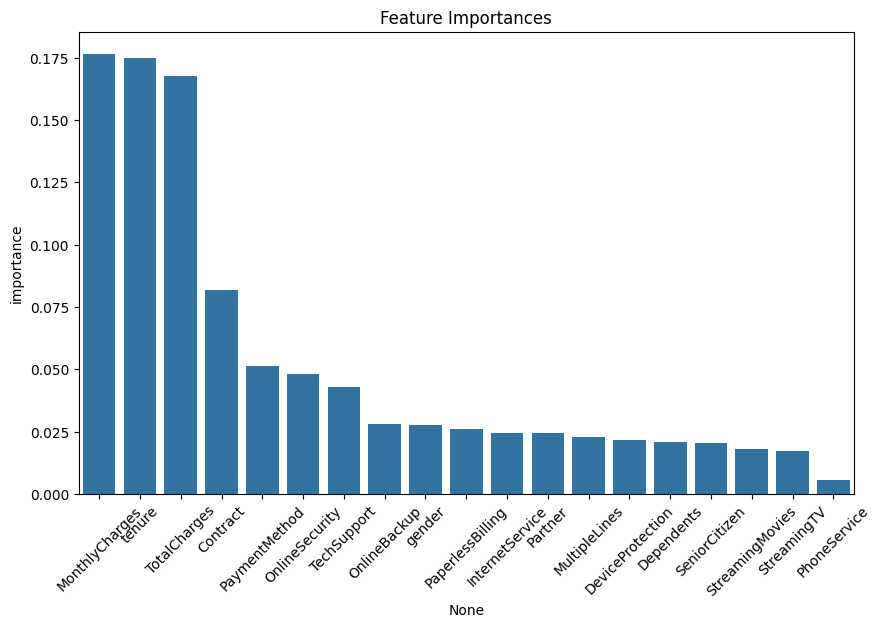

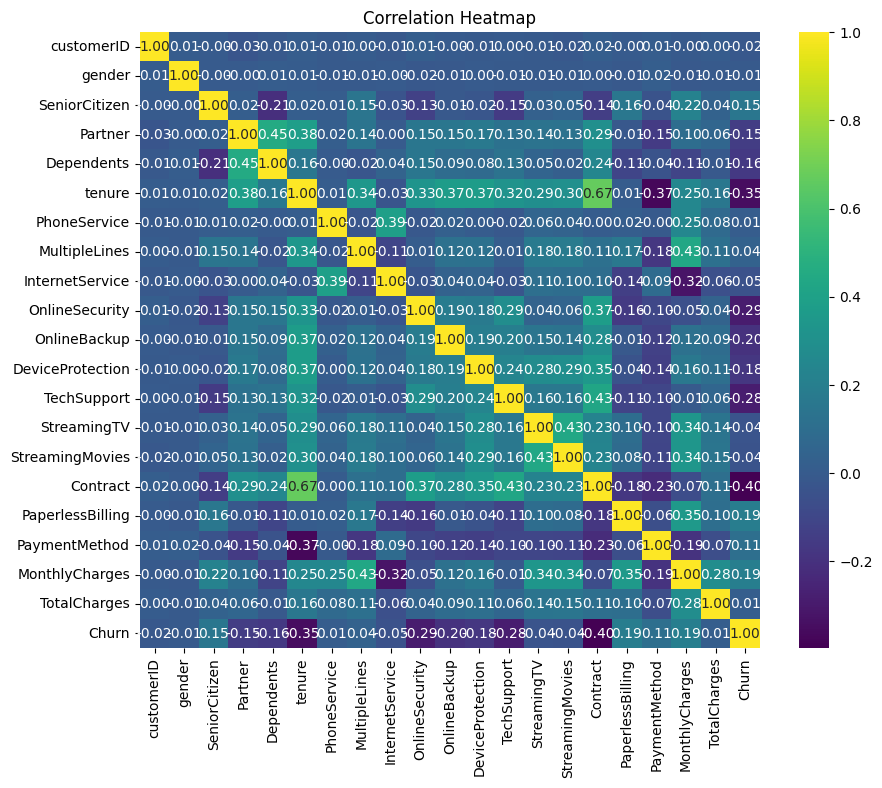

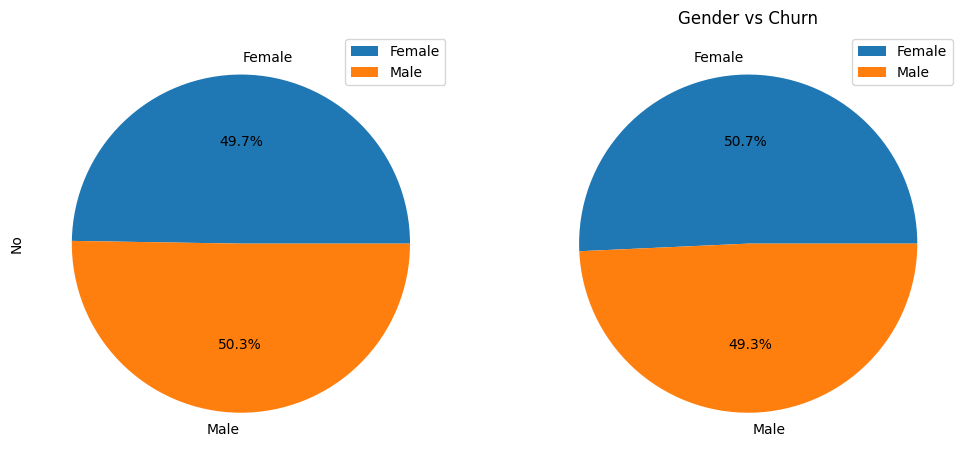

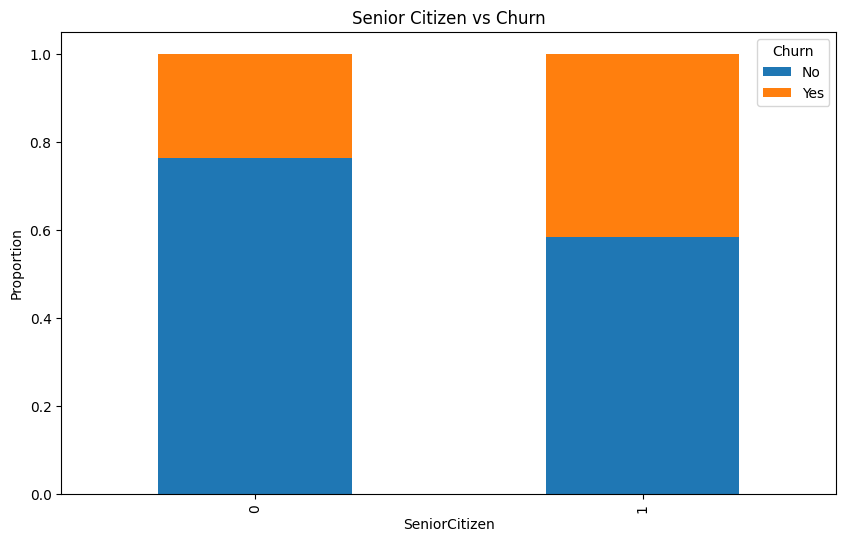

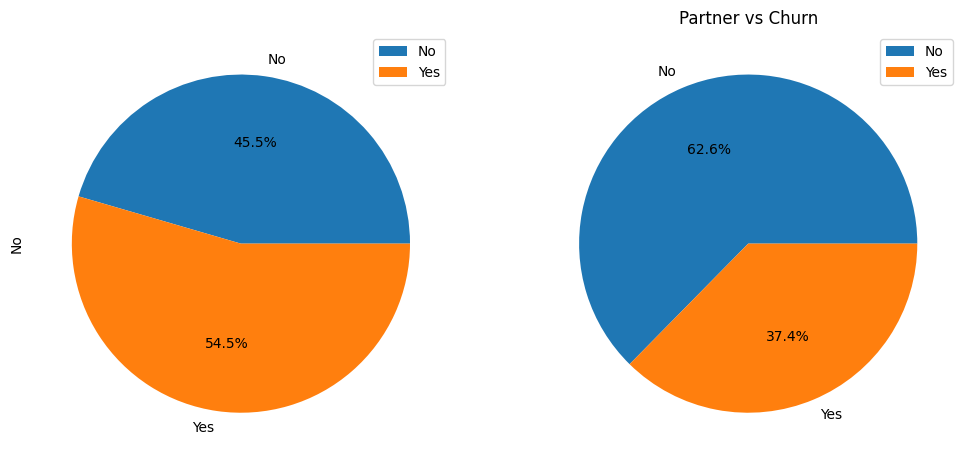

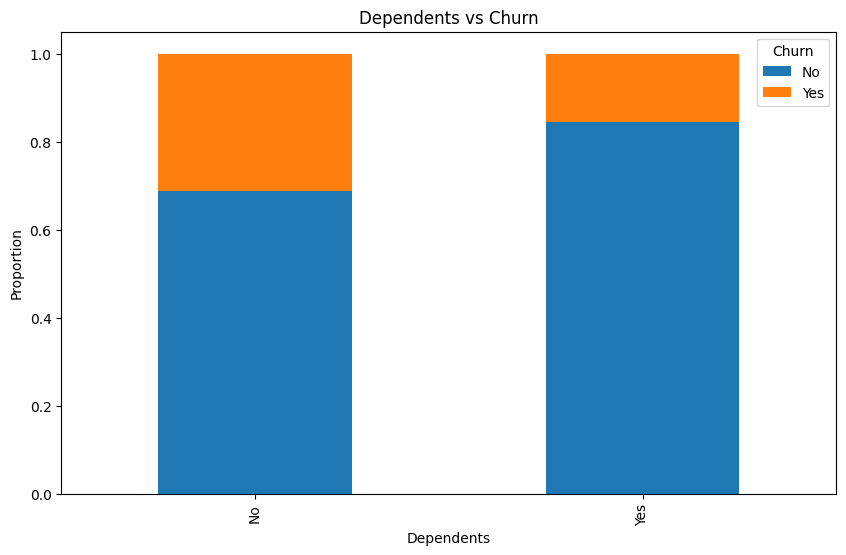

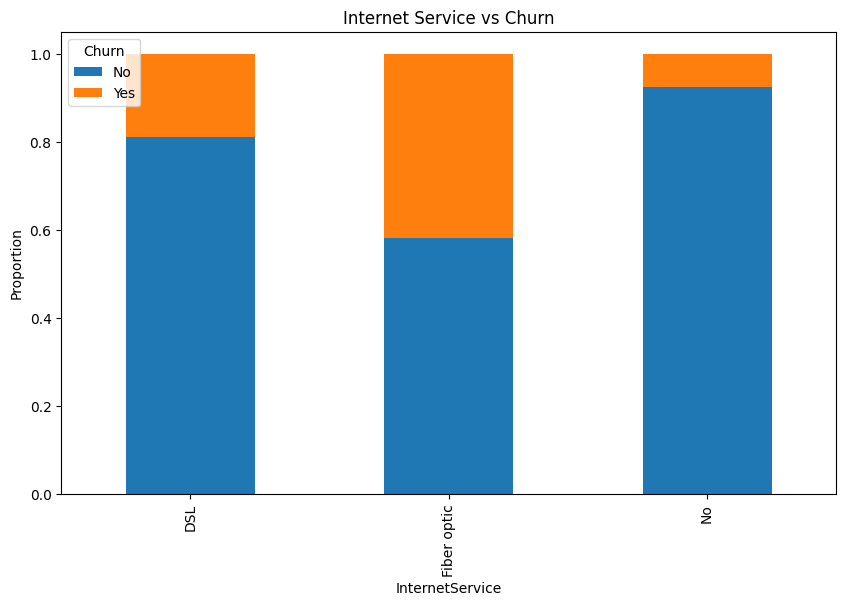

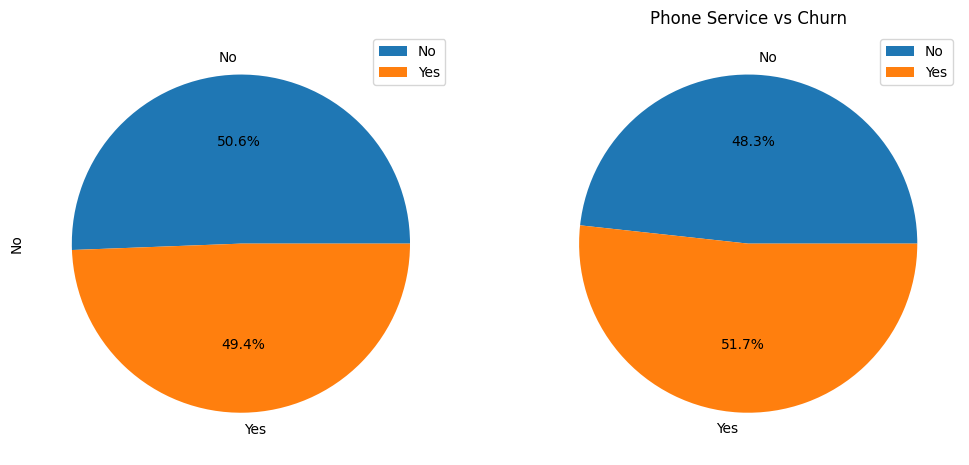

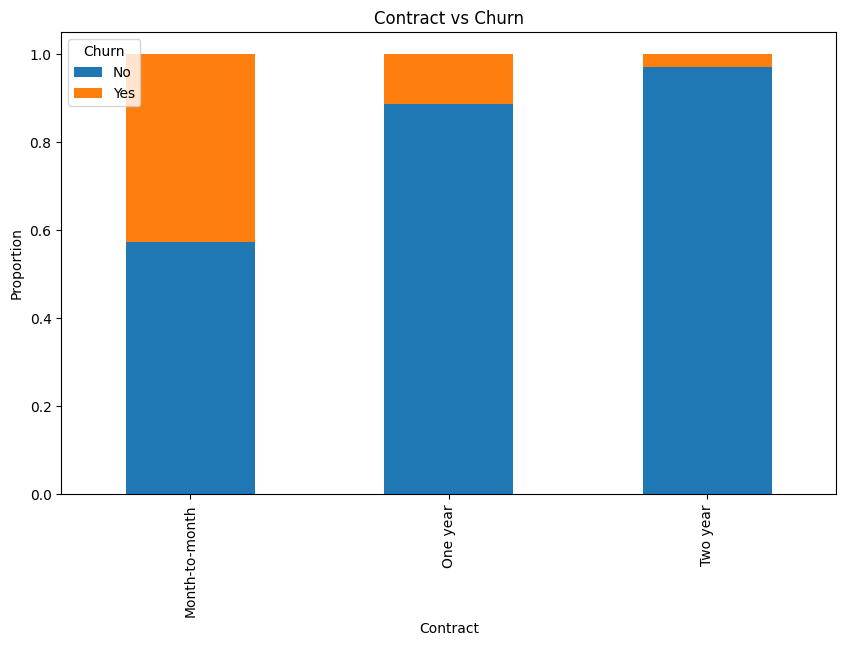

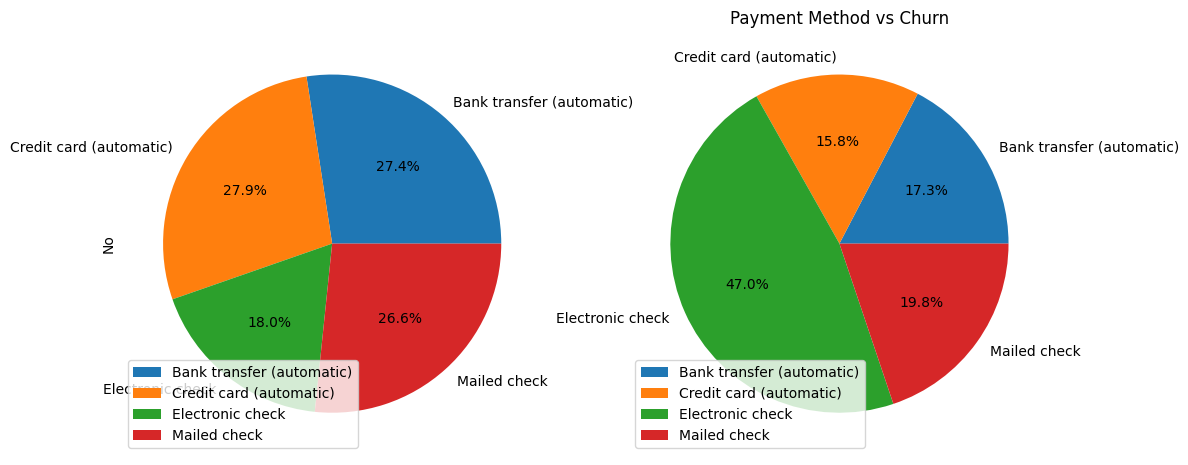

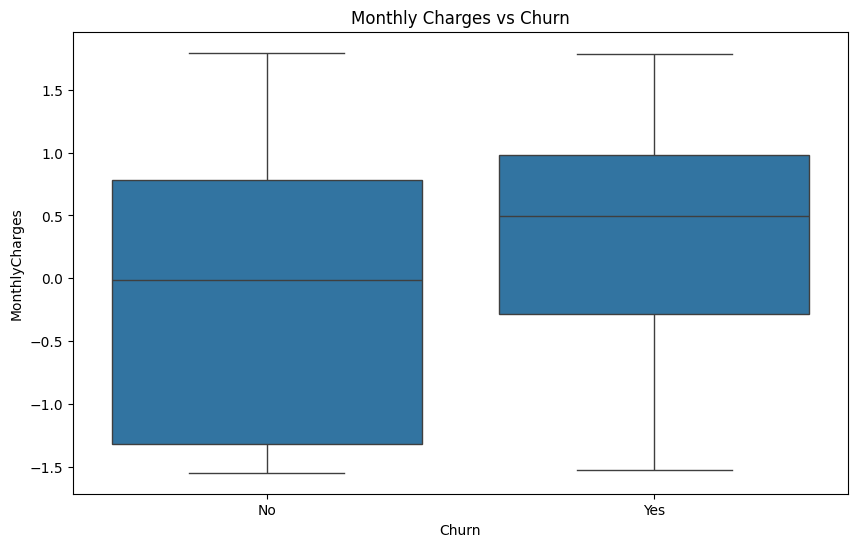

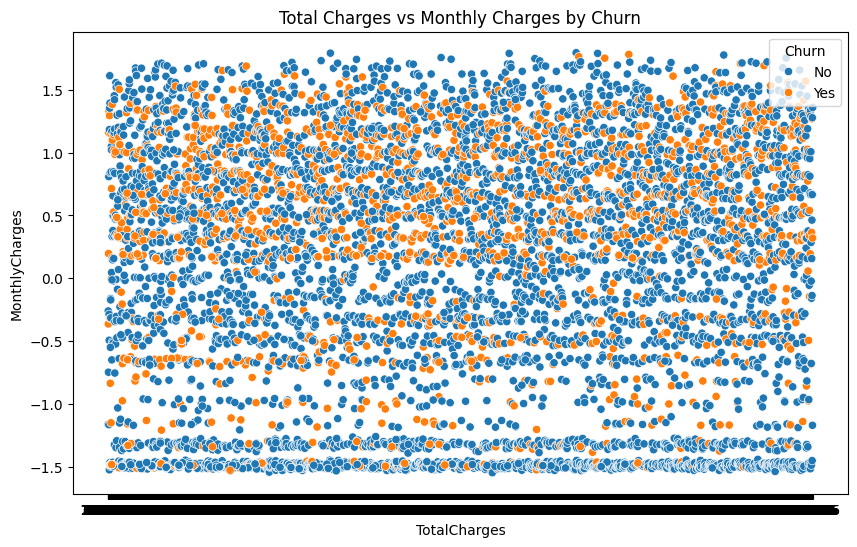

In [50]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

# Save the original categories for visualization
original_categories = df.select_dtypes(include=['object']).copy()

# Data Preprocessing
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])  # Encoding categorical variables

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])  # Scaling numerical features

# Splitting the dataset
X = df.drop(columns=['Churn', 'customerID'])  # Features
y = df['Churn']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split into train and test sets

# Model Building and Evaluation
model = RandomForestClassifier(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Use original categories for visualization
df_visualization = df.copy()
for column in original_categories.columns:
    df_visualization[column] = original_categories[column]

# Customer Demographics Analysis
# Gender vs Churn (Pie Chart Equivalent)
gender_churn = df_visualization.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
gender_churn.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(12, 6))
plt.title('Gender vs Churn')
plt.ylabel('')
plt.show()

# SeniorCitizen vs Churn (Bar Chart)
senior_citizen_churn = df_visualization.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
senior_citizen_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Senior Citizen vs Churn')
plt.ylabel('Proportion')
plt.show()

# Partner vs Churn (Pie Chart Equivalent)
partner_churn = df_visualization.groupby('Partner')['Churn'].value_counts(normalize=True).unstack()
partner_churn.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(12, 6))
plt.title('Partner vs Churn')
plt.ylabel('')
plt.show()

# Dependents vs Churn (Bar Chart)
dependents_churn = df_visualization.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack()
dependents_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Dependents vs Churn')
plt.ylabel('Proportion')
plt.show()

# Service Usage Analysis
# InternetService vs Churn (Bar Chart)
internet_service_churn = df_visualization.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
internet_service_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Internet Service vs Churn')
plt.ylabel('Proportion')
plt.show()

# PhoneService vs Churn (Pie Chart Equivalent)
phone_service_churn = df_visualization.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack()
phone_service_churn.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(12, 6))
plt.title('Phone Service vs Churn')
plt.ylabel('')
plt.show()

# Contract Types and Billing Analysis
# Contract vs Churn (Bar Chart)
contract_churn = df_visualization.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contract vs Churn')
plt.ylabel('Proportion')
plt.show()

# PaymentMethod vs Churn (Pie Chart Equivalent)
payment_method_churn = df_visualization.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
payment_method_churn.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(12, 6))
plt.title('Payment Method vs Churn')
plt.ylabel('')
plt.show()

# Monthly and Total Charges Analysis
# MonthlyCharges vs Churn (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_visualization)
plt.title('Monthly Charges vs Churn')
plt.show()

# TotalCharges vs Churn (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=df_visualization)
plt.title('Total Charges vs Monthly Charges by Churn')
plt.show()
